In [41]:
import pandas as pd

data = pd.read_csv("datasets/groceries.csv", header = None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transpose dataframe (swap columns with rows) so NaN values move to the end of the list

In [42]:
data = data.T

data.head()

,0,1,2,3,4,5,6,7,8,9,...,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834
0,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables,whole milk,rolls/buns,other vegetables,pot plants,whole milk,...,chicken,citrus fruit,frankfurter,sausage,tropical fruit,sausage,cooking chocolate,chicken,semi-finished bread,chicken
1,semi-finished bread,yogurt,NaN,yogurt,whole milk,butter,NaN,UHT-milk,NaN,cereals,...,hamburger meat,herbs,tropical fruit,butter,other vegetables,chicken,NaN,citrus fruit,bottled water,tropical fruit
2,margarine,coffee,NaN,cream cheese,condensed milk,yogurt,NaN,rolls/buns,NaN,NaN,...,citrus fruit,other vegetables,other vegetables,rolls/buns,domestic eggs,beef,NaN,other vegetables,soda,other vegetables
3,ready soups,NaN,NaN,meat spreads,long life bakery product,rice,NaN,bottled beer,NaN,NaN,...,root vegetables,dessert,whole milk,pickled vegetables,zwieback,hamburger meat,NaN,butter,bottled beer,vinegar
4,NaN,NaN,NaN,NaN,NaN,abrasive cleaner,NaN,liquor (appetizer),NaN,NaN,...,other vegetables,sugar,frozen meals,soda,ketchup,citrus fruit,NaN,yogurt,NaN,shopping bags


Drop NaN values from every transposed row and convert it to list of purchased items

In [43]:
transactions = data.apply(lambda x: x.dropna().tolist())

transactions = transactions.tolist()

transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk'

Encode purchased items in a dataframe

In [52]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()

encoded_transactions = encoder.fit_transform(transactions)

encoded_transactions

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
import pandas as pd

data = pd.DataFrame(encoded_transactions, columns = encoder.columns_)

data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Count the purchased items per transactions that has support greater than or equal min_support

In [93]:
from mlxtend.frequent_patterns import apriori

# 0.005 is an experimental value here
frequent_itemsets = apriori(data, min_support = 0.005, use_colnames = True)

frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.008033,(Instant food products),1
1,0.033452,(UHT-milk),1
2,0.017692,(baking powder),1
3,0.052466,(beef),1
4,0.033249,(berries),1
...,...,...,...
996,0.005186,"(whole milk, root vegetables, other vegetables...",4
997,0.007829,"(whole milk, root vegetables, other vegetables...",4
998,0.007626,"(whole milk, other vegetables, yogurt, tropica...",4
999,0.005592,"(whole milk, other vegetables, yogurt, whipped...",4


Generate association rules with a given min threshold of confidence

In [96]:
from mlxtend.frequent_patterns import association_rules

# 0.55 is an experimental value, confidence min threshold should be greater than min support
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.55)

rules = rules.sort_values("confidence", ascending = False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
53,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613,0.640185
45,"(root vegetables, other vegetables, pip fruit)",(whole milk),0.008134,0.255516,0.005491,0.675000,2.641713,0.003412,2.290720,0.626554
10,"(butter, whipped/sour cream)",(whole milk),0.010168,0.255516,0.006711,0.660000,2.583008,0.004113,2.189659,0.619150
35,"(pip fruit, whipped/sour cream)",(whole milk),0.009253,0.255516,0.005999,0.648352,2.537421,0.003635,2.117126,0.611558
11,"(butter, yogurt)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648,0.608978
8,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423,0.607217
18,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,0.003883,2.032240,0.602956
41,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566,0.700899
46,"(yogurt, other vegetables, pip fruit)",(whole milk),0.008134,0.255516,0.005084,0.625000,2.446031,0.003005,1.985291,0.596023
23,"(domestic eggs, pip fruit)",(whole milk),0.008643,0.255516,0.005389,0.623529,2.440275,0.003181,1.977536,0.595356


Generate strings data from antecedents and consequents objects

In [97]:
rules["index"] = rules.index
rules["antecedent"] = rules["antecedents"].apply(lambda x: ",".join(list(x)))
rules["consequent"] = rules["consequents"].apply(lambda x: ",".join(list(x)))

rules[["index", "antecedents", "antecedent", "consequents", "consequent", "confidence"]]

,index,antecedents,antecedent,consequents,consequent,confidence
53,53,"(root vegetables, yogurt, tropical fruit)","root vegetables,yogurt,tropical fruit",(whole milk),whole milk,0.700000
45,45,"(root vegetables, other vegetables, pip fruit)","root vegetables,other vegetables,pip fruit",(whole milk),whole milk,0.675000
10,10,"(butter, whipped/sour cream)","butter,whipped/sour cream",(whole milk),whole milk,0.660000
35,35,"(pip fruit, whipped/sour cream)","pip fruit,whipped/sour cream",(whole milk),whole milk,0.648352
11,11,"(butter, yogurt)","butter,yogurt",(whole milk),whole milk,0.638889
8,8,"(butter, root vegetables)","butter,root vegetables",(whole milk),whole milk,0.637795
18,18,"(curd, tropical fruit)","curd,tropical fruit",(whole milk),whole milk,0.633663
41,41,"(whole milk, root vegetables, citrus fruit)","whole milk,root vegetables,citrus fruit",(other vegetables),other vegetables,0.633333
46,46,"(yogurt, other vegetables, pip fruit)","yogurt,other vegetables,pip fruit",(whole milk),whole milk,0.625000
23,23,"(domestic eggs, pip fruit)","domestic eggs,pip fruit",(whole milk),whole milk,0.623529


Plot the association rules

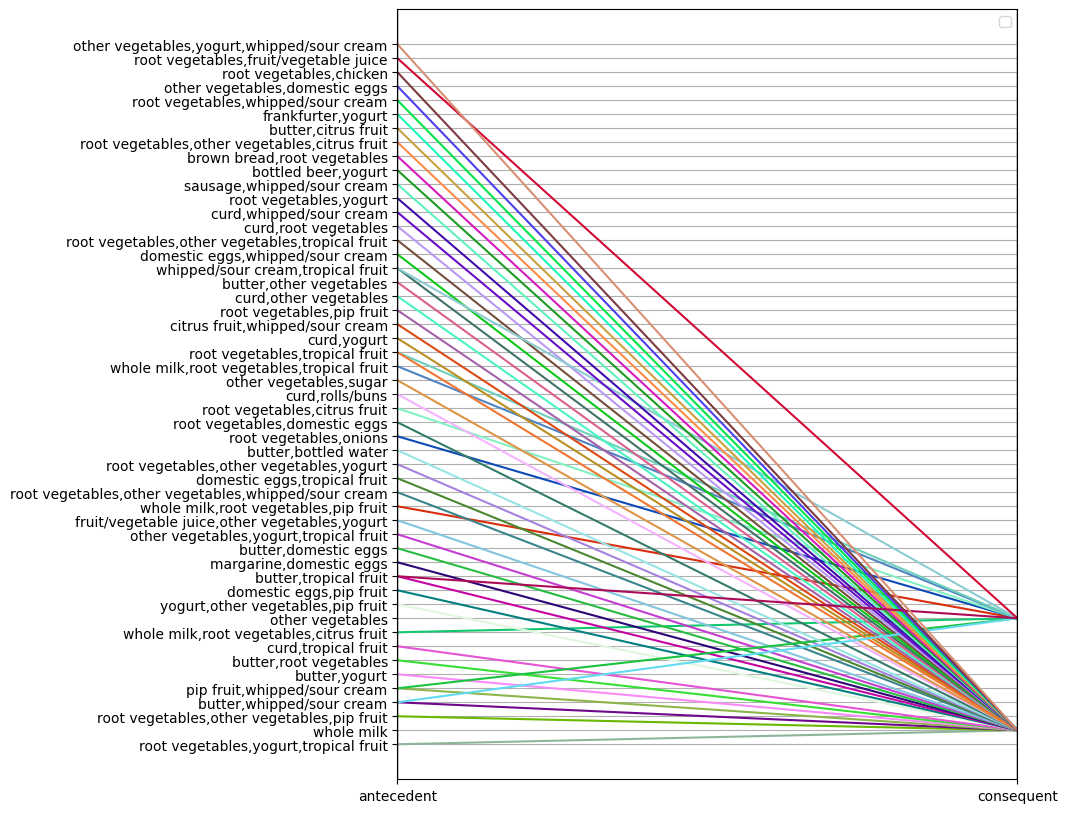

In [98]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize = (8, 10))

coords = rules[["index", "antecedent", "consequent"]]

parallel_coordinates(coords, "index")

plt.legend("")
plt.show()

Pivot the rules by confidence

In [99]:
matrix = rules.pivot(index = "antecedent", columns = "consequent", values = "confidence")

matrix

consequent,other vegetables,whole milk
antecedent,,
"bottled beer,yogurt",NaN,0.560440
"brown bread,root vegetables",NaN,0.560000
"butter,bottled water",NaN,0.602273
"butter,citrus fruit",NaN,0.555556
"butter,domestic eggs",NaN,0.621053
"butter,other vegetables",NaN,0.573604
"butter,root vegetables",NaN,0.637795
"butter,tropical fruit",0.551020,0.622449
"butter,whipped/sour cream",0.570000,0.660000


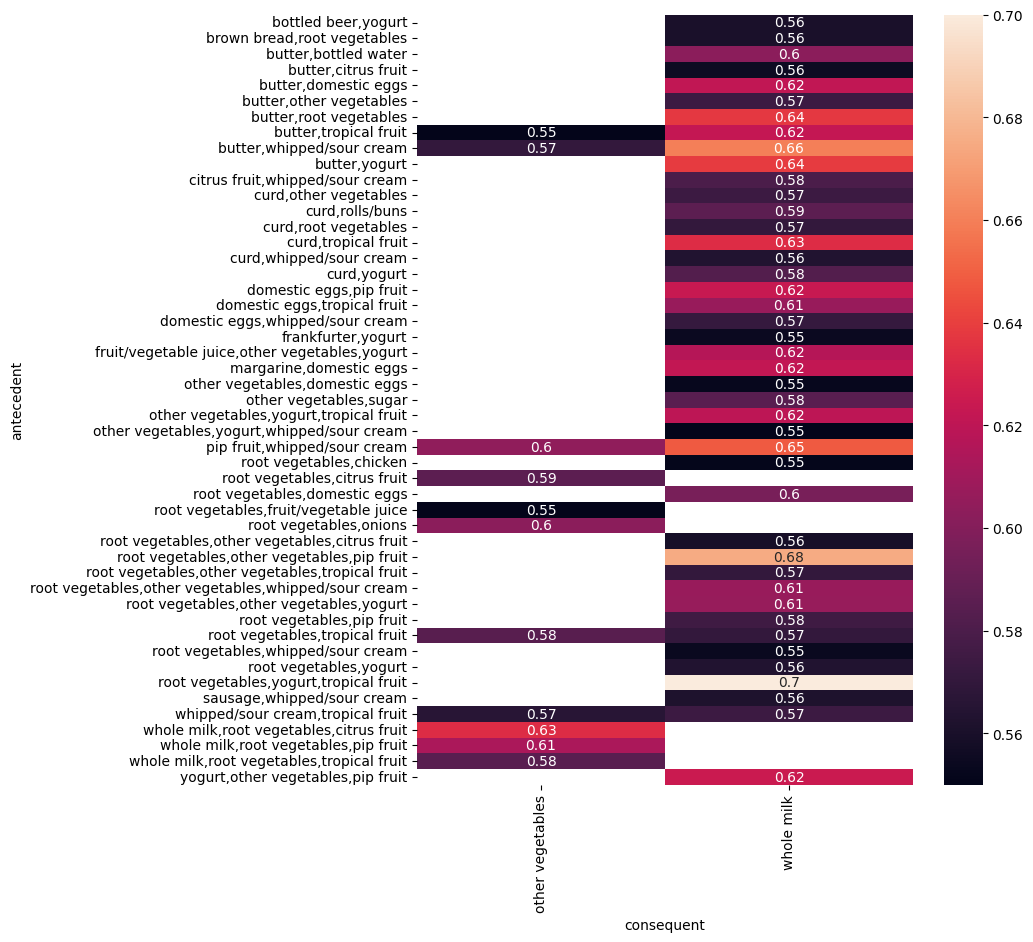

In [100]:
import seaborn as sns

plt.figure(figsize = (8, 10))
sns.heatmap(matrix, annot = True)
plt.xticks(rotation = 90)

plt.show()

In [101]:
def predict(items, rules, max_results = 6):
  predicts = rules[rules["antecedents"] == items]
  predicts = predicts[["consequent", "confidence"]]
  predicts.sort_values("confidence", ascending = False)

  return predicts[:max_results]

predict({"yogurt", "tropical fruit", "other vegetables"}, rules)

,consequent,confidence
51,whole milk,0.619835
